## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
data = pd.read_csv('gld_price_data.csv')

# Data analysis and data preprocessing

## Getting some informations about the dataset

In [3]:
data.shape

(2290, 6)

In [4]:
data.head(2)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491


In [5]:
data.tail(2)

,Date,SPX,GLD,USO,SLV,EUR/USD
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# Getting some statistical measures about the dataset
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## The number of missing values in each column

In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## Understanding the correlation between various features
The type of correlations:
* 1- Positive correlation
* 2- Negative correlation

<ipython-input-9-a703307df59e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

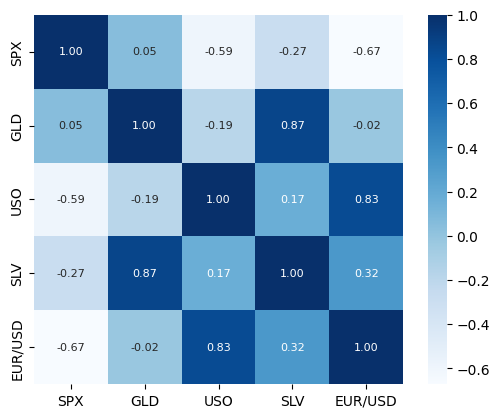

In [9]:
corr = data.corr()
sns.heatmap(corr, cbar=True, square=True, annot=True, annot_kws={'size': 8}, fmt='.2f', cmap='Blues')

In [10]:
corr['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

## The distribution of the dependent variable

<ipython-input-11-72efe30c31f1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

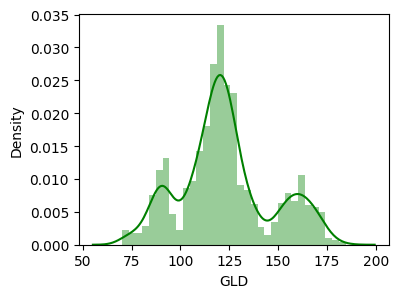

In [11]:
plt.figure(figsize=(4,3))
sns.distplot(data['GLD'], color='green')

## Getting the independent variables and the dependent variable

In [12]:
X = data.drop(columns=['Date', 'GLD']).values
y = data['GLD'].values

In [13]:
print(X.shape)
print(y.shape)

(2290, 4)
(2290,)


## Splitting the dataset into the training set and the test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1832, 4)
(458, 4)
(1832,)
(458,)


## Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print(X_train.shape)
print(X_test.shape)

(1832, 4)
(458, 4)


# Model selection

## 1- The mulitple linear regression model

In [18]:
# Training the model on the training set
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [19]:
# Applying the k-fold cross validation set
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator=regressor1, X=X_train, y=y_train, cv=10)
print(f"The average accuracy: {accuracies1.mean():.2f}")
print(f"The standard deviation: {accuracies1.std()*100:.2f}")

The average accuracy: 0.88
The standard deviation: 1.82


In [20]:
# Evaluating the linear regression model on the test set
from sklearn.metrics import r2_score
y_pred1 = regressor1.predict(X_test)
score1 = r2_score(y_test, y_pred1)
print(f"score1 = {score1}")

score1 = 0.8657886565869237


## 2- The polynomial regression model

In [21]:
# Training the model on the training set
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
regressor2 = LinearRegression()
regressor2.fit(X_poly, y_train)

LinearRegression()

In [22]:
# Applying the k-fold cross validation set
accuracies2 = cross_val_score(estimator=regressor2, X=X_train, y=y_train, cv=10)
print(f"The average accuracy: {accuracies2.mean():.2f}")
print(f"The standard deviation: {accuracies2.std()*100:.2f}")

The average accuracy: 0.88
The standard deviation: 1.82


In [23]:
# Evaluating the linear regression model on the test set
from sklearn.metrics import r2_score
y_pred2 = regressor2.predict(poly.transform(X_test))
score2 = r2_score(y_test, y_pred2)
print(f"score2 = {score2}")

score2 = 0.9566198603031448


## 3- The support vector regression model (SVR)

In [24]:
# Training the model on the training set
from sklearn.svm import SVR
regressor3 = SVR()
regressor3.fit(X_train, y_train)

SVR()

In [25]:
# Applying the k-fold cross validation set
accuracies3 = cross_val_score(estimator=regressor3, X=X_train, y=y_train, cv=10)
print(f"The average accuracy: {accuracies3.mean():.2f}")
print(f"The standard deviation: {accuracies3.std()*100:.2f}")

The average accuracy: 0.94
The standard deviation: 1.03


In [26]:
# Evaluating the linear regression model on the test set
y_pred3 = regressor3.predict(X_test)
score3 = r2_score(y_test, y_pred3)
print(f"score3 = {score3}")

score3 = 0.9382723943216776


## 4- The decision tree regression

In [27]:
# Training the model on the training set
from sklearn.tree import DecisionTreeRegressor
regressor4 = DecisionTreeRegressor()
regressor4.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
# Applying the k-fold cross validation set
accuracies4 = cross_val_score(estimator=regressor4, X=X_train, y=y_train, cv=10)
print(f"The average accuracy: {accuracies4.mean():.2f}")
print(f"The standard deviation: {accuracies4.std()*100:.2f}")

The average accuracy: 0.98
The standard deviation: 0.71


In [29]:
# Evaluating the linear regression model on the test set
y_pred4 = regressor4.predict(X_test)
score4 = r2_score(y_test, y_pred3)
print(f"score4 = {score4}")

score4 = 0.9382723943216776


## 5- The random forest regression model

In [30]:
# Training the model on the training set
from sklearn.ensemble import RandomForestRegressor
regressor5 = RandomForestRegressor()
regressor5.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
# Applying the k-fold cross validation set
accuracies5 = cross_val_score(estimator=regressor5, X=X_train, y=y_train, cv=10)
print(f"The average accuracy: {accuracies5.mean():.2f}")
print(f"The standard deviation: {accuracies5.std()*100:.2f}")

The average accuracy: 0.99
The standard deviation: 0.35


In [32]:
# Evaluating the linear regression model on the test set
y_pred5 = regressor5.predict(X_test)
score5 = r2_score(y_test, y_pred5)
print(f"score5 = {score5}")

score5 = 0.9894902995601584


# Selecting the decision tree regression model as the best model

## Comparing the actual values and the predicted values in a plot

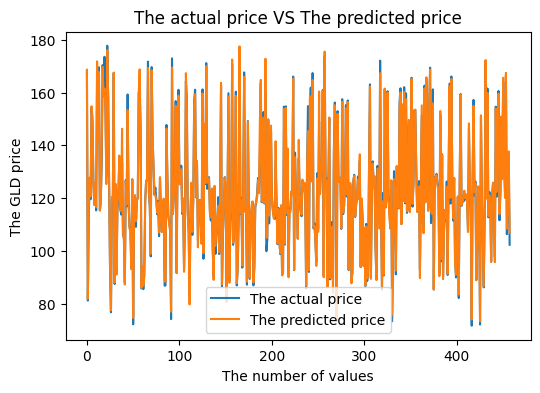

In [33]:
plt.figure(figsize=(6,4))
plt.plot(y_test, label='The actual price')
plt.plot(regressor5.predict(X_test), label='The predicted price')
plt.xlabel('The number of values')
plt.ylabel('The GLD price')
plt.title('The actual price VS The predicted price')
plt.legend()
plt.show()